In [34]:
import numpy as np

M_star=-20.5
phi_star=10**(-3.5)
alpha=-2
#Luminosity
def L_uv(M):
    ten_pc=3.0857e19
    return 4*np.pi*(ten_pc)**2*10**(-0.4*(M+48.6))
# UV luminosity function
def phi_M(M,phi_star,M_star,alpha):
    x=10**(-0.4*(M-M_star))
    return 0.4*np.log(10)*phi_star*x**(alpha+1)*np.exp(-x)

#UV luminosity density
M_bright=-30
M_faint=-15
def rho_uv(M_bright,M_faint,step=0.01):
    M=np.arange(M_bright,M_faint,step)
    Lnu=L_uv(M)
    phi=phi_M(M,phi_star,M_star,alpha)
    rho=np.trapz(Lnu*phi,M)
    return rho
rho_uv_value=rho_uv(M_bright,M_faint,step=0.01)
print("UV luminiosity density:",rho_uv_value)

UV luminiosity density: 9.766515756257466e+25


In [35]:
n_ion=3.12*10**50
zita_ion=2*10**25
f_esc=n_ion/(rho_uv_value*zita_ion)
print("Escape fraction of galaxies:",f_esc)

Escape fraction of galaxies: 0.1597294305290501


In [12]:
M_star=-17.52
phi_star=10**(-3) #in Gpc^-3mag^-1
alpha=-1.51
beta=-2.78
#Luminosity
def L_uv(M):
    ten_pc=3.0857e19
    return 4*np.pi*(ten_pc)**2*10**(-0.4*(M+48.6))
# UV luminosity function
def phi_M(M,phi_star,M_star,alpha,beta):
    x=10**(0.4*(M-M_star))
    return phi_star/(x**(alpha+1)+x**(beta+1))
#UV luminosity density
M_bright=-30
M_faint=-15
def rho_uv(M_bright,M_faint,step=0.01):
    M=np.arange(M_bright,M_faint,step)
    Lnu=L_uv(M)
    phi=phi_M(M,phi_star,M_star,alpha,beta)
    rho=np.trapz(Lnu*phi,M)
    return rho
rho_uv_value_1=rho_uv(M_bright,M_faint,step=0.01)
print("UV luminiosity density of AGN:",rho_uv_value_1)

UV luminiosity density of AGN: 9.578410338616064e+24


In [14]:
n_ion=1.46*10**50
zita_ion=2*10**25
f_esc=n_ion/(rho_uv_value_1*zita_ion)
print("Escape fraction of AGN",f_esc)

Escape fraction of AGN 0.7621306398379607


In [55]:
y=f_esc*rho_uv_value_1*zita_ion
print(y)

1.4599999999999998e+50


In [56]:
n_req=4.58e50
fAGN=y/n_req
print("Frcation of LyC photons emitted by AGNS:",fAGN)

Frcation of LyC photons emitted by AGNS: 0.3187772925764192


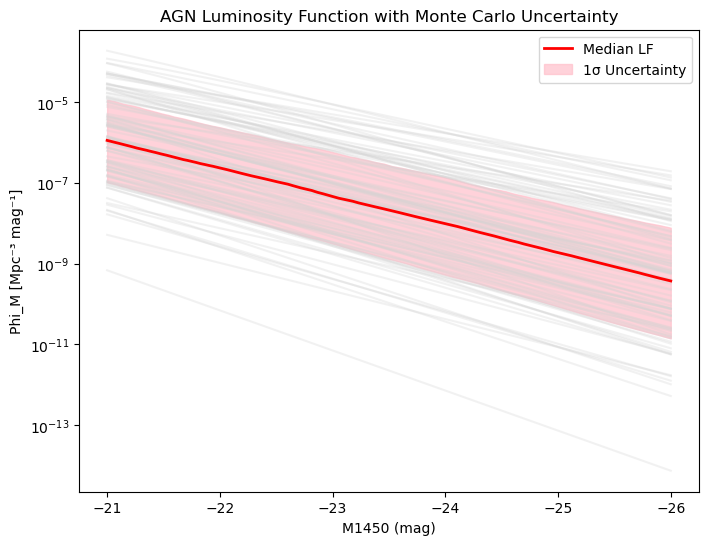

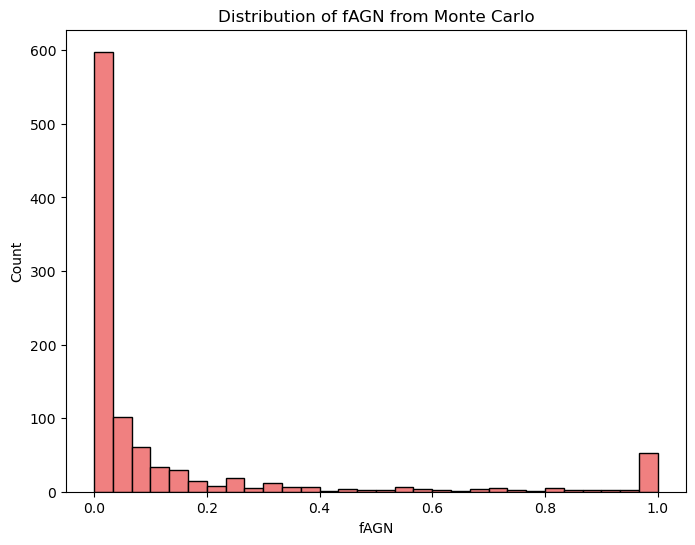

fAGN = 0.018792957378946033
Lower error = 0.017409571885854683
Upper error = 0.18423700303261148


In [3]:
import numpy as np
import matplotlib.pyplot as plt


alpha_mean = -1.51
alpha_sigma = 0.37

beta_mean = -2.78
beta_sigma = 0.30

Mstar_mean = -17.5
Mstar_sigma = 1.01

logphi_mean = -3.5
logphi_sigma = 0.6  


fesc_AGN = 0.75
xi_ion_AGN = 10**25.6  

N_required = 10**50.48  


Mgrid = np.linspace(-26, -21, 400)


def Lnu_from_M(M):
    """UV luminosity from AB magnitude"""
    return 10**(-0.4*(M + 48.6)) * (4*np.pi*(10*3.086e18)**2)

def DPL_LF(M, alpha, beta, Mstar, phi_star):
    """Double-power-law LF"""
    term1 = 10**(0.4*(alpha+1)*(M - Mstar))
    term2 = 10**(0.4*(beta+1)*(M - Mstar))
    return phi_star / (term1 + term2)

nsamples = 1000

LF_collection = []
rhoUV_list = []
fAGN_list = []

for i in range(nsamples):

    
    alpha_i = np.random.normal(alpha_mean, alpha_sigma)
    beta_i  = np.random.normal(beta_mean, beta_sigma)
    Mstar_i = np.random.normal(Mstar_mean, Mstar_sigma)
    logphi_i = np.random.normal(logphi_mean, logphi_sigma)
    phi_i = 10**(logphi_i)

    
    LF_i = DPL_LF(Mgrid, alpha_i, beta_i, Mstar_i, phi_i)
    LF_collection.append(LF_i)

    # compute rho UV
    Lnu = Lnu_from_M(Mgrid)
    rhoUV_i = np.trapz(Lnu * LF_i, Mgrid)
    rhoUV_list.append(rhoUV_i)

    # compute N_AGN
    N_AGN_i = fesc_AGN * xi_ion_AGN * rhoUV_i

    # compute fAGN
    fAGN_i = N_AGN_i / N_required
    fAGN_list.append(fAGN_i)

LF_collection = np.array(LF_collection)
rhoUV_list = np.array(rhoUV_list)
fAGN_list = np.clip(fAGN_list,0,1)


median_LF = np.median(LF_collection, axis=0)
p16 = np.percentile(LF_collection, 16, axis=0)
p84 = np.percentile(LF_collection, 84, axis=0)

plt.figure(figsize=(8,6))
for i in range(100):
    plt.plot(Mgrid, LF_collection[i], color='lightgray', alpha=0.3)
plt.plot(Mgrid, median_LF, color='red', lw=2, label='Median LF')
plt.fill_between(Mgrid, p16, p84, color='pink', alpha=0.7, label='1σ Uncertainty')
plt.yscale('log')
plt.gca().invert_xaxis()
plt.xlabel('M1450 (mag)')
plt.ylabel('Phi_M [Mpc⁻³ mag⁻¹]')
plt.title('AGN Luminosity Function with Monte Carlo Uncertainty')
plt.legend()
plt.show()


# -----------------------------
plt.figure(figsize=(8,6))
plt.hist(fAGN_list, bins=30, color='lightcoral', edgecolor='black')
plt.xlabel('fAGN')
plt.ylabel('Count')
plt.title('Distribution of fAGN from Monte Carlo')
plt.show()


fAGN_median = np.median(fAGN_list)
fAGN_low = np.percentile(fAGN_list, 16)
fAGN_high = np.percentile(fAGN_list, 84)

print("fAGN =", fAGN_median)
print("Lower error =", fAGN_median - fAGN_low)
print("Upper error =", fAGN_high - fAGN_median)
